# Part 2: Varying BPTT values

In [1]:
from main_2 import main, Config
import matplotlib.pyplot as plt
import torch

In [3]:
# Configure
config = Config()
config.epochs = 10
bptt_values = [20,45,60]
transformer_ppls = []

# Run experiments for Transformer
config.model = 'Transformer'
for bptt in bptt_values:
    config.bptt = bptt
    test_ppl = main(config)
    transformer_ppls.append(test_ppl)

| epoch   1 |   200/ 5221 batches | lr 20.00 | ms/batch 79.05 | loss 18.39 | ppl 97453057.00
| epoch   1 |   400/ 5221 batches | lr 20.00 | ms/batch 79.30 | loss 13.19 | ppl 536189.28
| epoch   1 |   600/ 5221 batches | lr 20.00 | ms/batch 78.67 | loss 11.34 | ppl 83711.87
| epoch   1 |   800/ 5221 batches | lr 20.00 | ms/batch 79.04 | loss 10.26 | ppl 28436.56
| epoch   1 |  1000/ 5221 batches | lr 20.00 | ms/batch 81.34 | loss  9.52 | ppl 13631.81
| epoch   1 |  1200/ 5221 batches | lr 20.00 | ms/batch 84.01 | loss  8.93 | ppl  7563.22
| epoch   1 |  1400/ 5221 batches | lr 20.00 | ms/batch 84.84 | loss  8.93 | ppl  7529.08
| epoch   1 |  1600/ 5221 batches | lr 20.00 | ms/batch 84.97 | loss  8.71 | ppl  6088.17
| epoch   1 |  1800/ 5221 batches | lr 20.00 | ms/batch 85.39 | loss  8.76 | ppl  6346.52
| epoch   1 |  2000/ 5221 batches | lr 20.00 | ms/batch 85.96 | loss  8.67 | ppl  5849.08
| epoch   1 |  2200/ 5221 batches | lr 20.00 | ms/batch 85.61 | loss  8.46 | ppl  4706.56
| epoc

In [2]:
config = Config()
config.epochs = 10
bptt_values = [20,45,60]

In [3]:
lstm_ppls = []

# Run experiments for LSTM
config.model = 'LSTM'
for bptt in bptt_values:
    config.bptt = bptt
    test_ppl = main(config)
    lstm_ppls.append(test_ppl)

| epoch   1 |   200/ 5221 batches | lr 20.00 | ms/batch 81.71 | loss  7.66 | ppl  2114.77
| epoch   1 |   400/ 5221 batches | lr 20.00 | ms/batch 81.40 | loss  6.88 | ppl   975.89
| epoch   1 |   600/ 5221 batches | lr 20.00 | ms/batch 84.01 | loss  6.59 | ppl   730.36
| epoch   1 |   800/ 5221 batches | lr 20.00 | ms/batch 87.03 | loss  6.35 | ppl   573.32
| epoch   1 |  1000/ 5221 batches | lr 20.00 | ms/batch 87.97 | loss  6.19 | ppl   490.03
| epoch   1 |  1200/ 5221 batches | lr 20.00 | ms/batch 88.48 | loss  6.07 | ppl   431.03
| epoch   1 |  1400/ 5221 batches | lr 20.00 | ms/batch 88.27 | loss  6.02 | ppl   412.50
| epoch   1 |  1600/ 5221 batches | lr 20.00 | ms/batch 88.08 | loss  5.94 | ppl   379.16
| epoch   1 |  1800/ 5221 batches | lr 20.00 | ms/batch 87.98 | loss  5.91 | ppl   369.99
| epoch   1 |  2000/ 5221 batches | lr 20.00 | ms/batch 88.15 | loss  5.85 | ppl   347.79
| epoch   1 |  2200/ 5221 batches | lr 20.00 | ms/batch 88.18 | loss  5.83 | ppl   339.32
| epoch   

## Insert the default bptt = 35 and the result we got from part 1

In [17]:
bptt_values = [20,45,60]

In [18]:
bptt_values.insert(1,35)
print("bptt range: ", bptt_values)

lstm_ppls.insert(1,109.52)
print("LSTM PPLs result: ", lstm_ppls)

transformer_ppls.insert(1,892.09)
print("Transformers PPLs result: ", transformer_ppls)


bptt range:  [20, 35, 45, 60]
LSTM PPLs result:  [123.72180801785076, 109.52, 131.94928695417394, 131.16816002112566]
Transformers PPLs result:  [925.91, 892.09, 981.38, 1042.19]


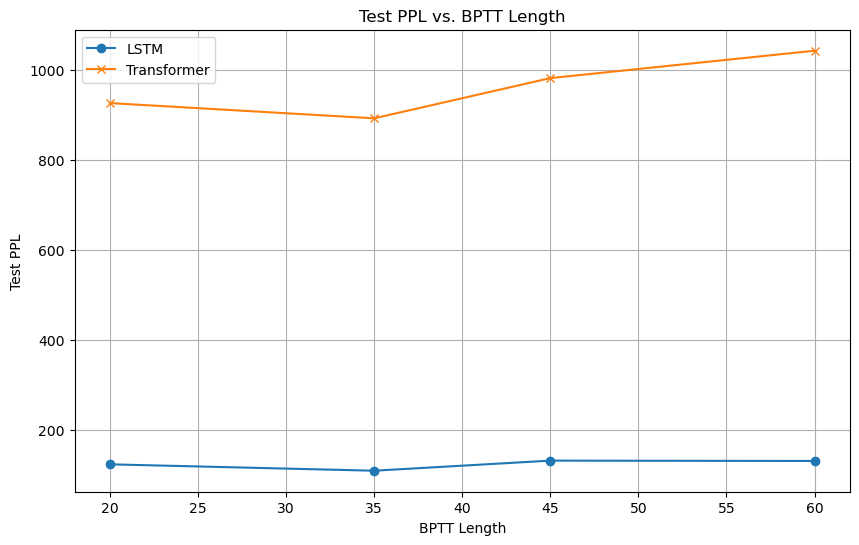

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(bptt_values, lstm_ppls, label='LSTM', marker='o')
plt.plot(bptt_values, transformer_ppls, label='Transformer', marker='x')
plt.xlabel('BPTT Length')
plt.ylabel('Test PPL')
plt.title('Test PPL vs. BPTT Length')
plt.legend()
plt.grid(True)
plt.show()

Observations regarding the test Perplexity (PPL) of LSTM and Transformer models across different BPTT lengths:

1. LSTM Performance:
- The LSTM model's test PPL significantly decreases as the BPTT length increases from 20 to around 35, which indicates that the LSTM is able to utilize the additional context provided by a longer BPTT to improve performance.
- Beyond a BPTT length of 35, the test PPL of the LSTM stabilizes. This plateau suggests that extending the BPTT length beyond this point does not provide additional benefits for the LSTM model, possibly due to the nature of the dependencies in the dataset.

2. Transformer Performance:
- The Transformer model's test PPL remains relatively stable across all BPTT lengths. This behavior is in line with the Transformer's design, which can inherently handle long-range dependencies due to its self-attention mechanism. Therefore, it's less sensitive to changes in BPTT length.
- There is a slight upward trend in PPL for the Transformer as BPTT length increases. This could indicate a minor sensitivity to the BPTT length or possibly other factors such as model configuration or training specifics.

3. Comparison of Models:
- The LSTM model outperforms the Transformer model at all tested BPTT lengths, as indicated by the lower PPL values. One of the reasons could be the LSTM architecture is better suited to the characteristics of our dataset.
- The relative complexity of the Transformer may require more careful tuning, including aspects like learning rate, number of attention heads, or other hyperparameters that are not captured by changes in BPTT length alone.

4. BPTT Impact:
- For LSTMs, the BPTT length directly influences the amount of temporal context the model can leverage during training. The graph indicates that there is an optimal BPTT length (around 35) for this dataset where extending the BPTT length further does not yield improvements.
- For Transformers, the BPTT length does not seem to have a significant impact on performance, which is expected given the model's ability to process sequences globally.
